## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here

import pandas as pd
data = pd.read_csv('heart.csv')

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
#Your code here
from sklearn.model_selection import train_test_split

X = data[data.columns[0:-1]]
y = data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 17)


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [14]:
import math
import numpy as np


def sigmoid(x):
    x = np.array(x)
    return 1/(1+(math.e ** - x))
    

# Your code here
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1], 1)).flatten()
        initial_weights += 1
        
    weights = initial_weights
           
    for iteration in range(max_iterations):
        predictions = sigmoid(np.dot(X,weights))   
        error = y - predictions
        gradient = np.dot(X.transpose(),error) 
        weights += alpha * gradient
    return weights

              
weights = grad_desc(X_train, y_train, max_iterations = 50000, alpha = .001)

## Now use your algorithm to make [probability] predictions on the test set

In [15]:
#Your code here
y_hat_test = sigmoid(np.dot(X_test,weights))

## Create an ROC curve for your predictions

AUC: 0.8996515679442508


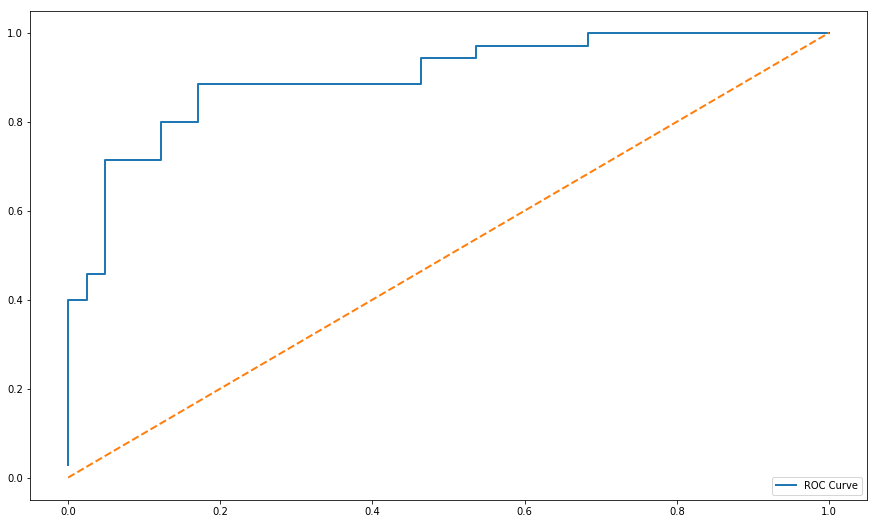

In [18]:
#Your code here

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

print('AUC: {}'.format(auc(fpr, tpr)))

lw = 2
plt.figure(figsize = (15,9))
plt.plot(fpr, tpr, lw = lw, label = 'ROC Curve')
plt.plot([0,1], [0,1], lw = lw, linestyle = '--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'False Negative Rate'
plt.xticks = [i/20 for i in range(21)]
plt.yticks = [i/20 for i in range(21)]
plt.legend(loc = 'lower right')
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

In [ ]:
# Your code here

weights = grad_desc(X_train, y_train, max_iterations = 50000, alpha = .001)

y_hat_test = sigmoid(np.dot(X_test,weights))
y_hat_train = sigmoid(np.dot(X_train,weights))


fpr_test, tpr_test, thresholds = roc_curve(y_test, y_hat_test)
print('AUC: {}'.format(auc(fpr, tpr)))

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_hat_train)
print('AUC: {}'.format(auc(fpr_train, tpr_train)))




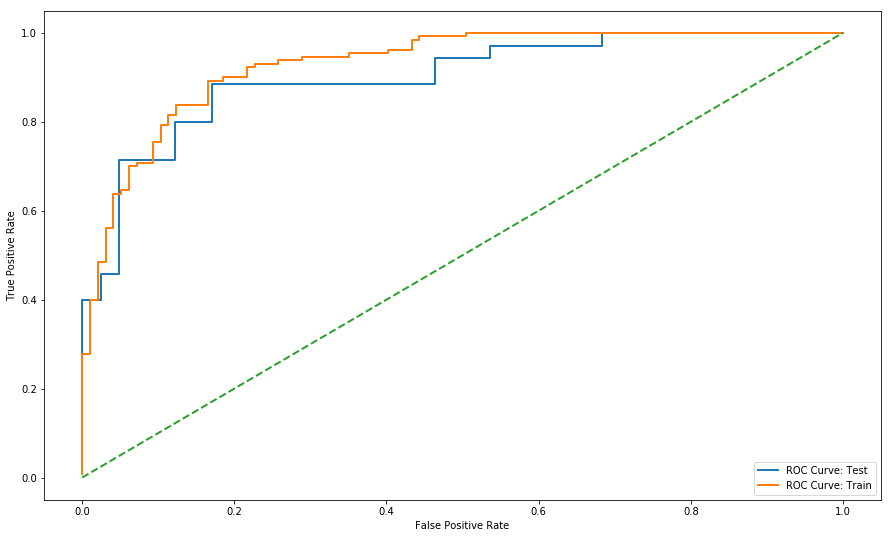

In [35]:
lw = 2
fig, ax = plt.subplots(1, 1, figsize = (15,9))
ax.plot(fpr_test, tpr_test, lw = lw, label = 'ROC Curve: Test')
ax.plot(fpr_train, tpr_train, lw = lw, label = 'ROC Curve: Train')
ax.plot([0,1], [0,1], lw = lw, linestyle = '--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xticks = [i/20 for i in range(21)]
ax.set_yticks = [i/20 for i in range(21)]
ax.legend(loc = 'lower right')
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

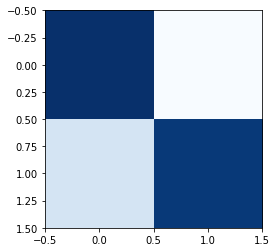

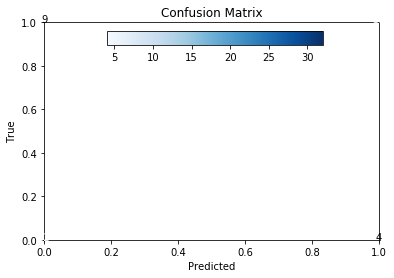

In [53]:
# Your code here

import itertools

def binary_prediction(probabilities, threshold = .5):
    classes = []
    for p in probabilities:
        if p>= threshold:
            classes.append(1)
        else: classes.append(0)
    return classes

test_predictions = binary_prediction(y_hat_test)


from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.
im = ax.imshow(cnf_matrix,  cmap=plt.cm.Blues)
fig, ax = plt.subplots(sharex= True, sharey = True)

#Add title and Axis Labels
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks, class_names)
ax.set_yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
color_axis = fig.add_axes([0.27, 0.8, 0.5, 0.05])
fig.colorbar(im, cax = color_axis, orientation = 'horizontal')


## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [54]:
# Your code here

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e16)
model = logreg.fit(X_train, y_train)
model

LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Create an ROC Curve for the sci-kit learn model

AUC: 0.8996515679442508


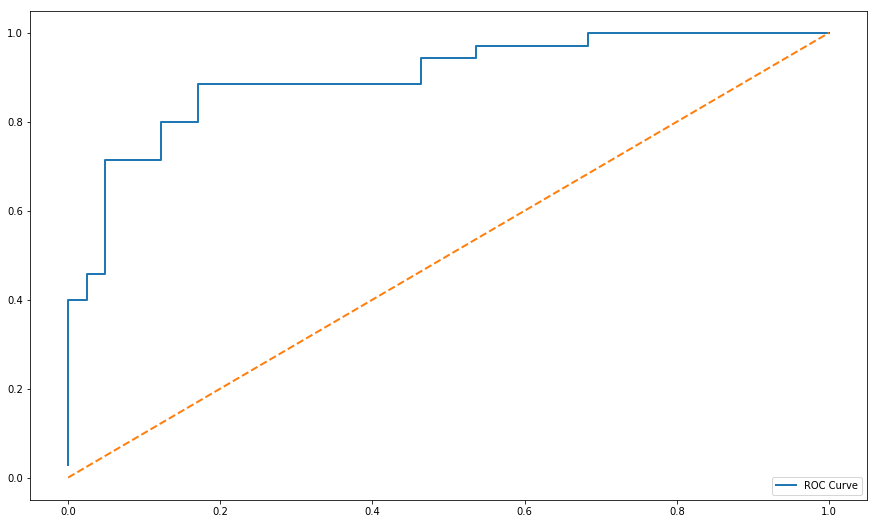

In [55]:
#Your code here
y_score = logreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

lw = 2
plt.figure(figsize = (15,9))
plt.plot(fpr, tpr, lw = lw, label = 'ROC Curve')
plt.plot([0,1], [0,1], lw = lw, linestyle = '--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'False Negative Rate'
plt.xticks = [i/20 for i in range(21)]
plt.yticks = [i/20 for i in range(21)]
plt.legend(loc = 'lower right')
plt.show()

## As before add an ROC curve to the graph for the train set as well

In [57]:
#Your code here

tpr_test = tpr
fpr_test = fpr


y_score = logreg.decision_function(X_train)

fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score)

print('AUC(test): {}'.format(auc(fpr, tpr)))

print('AUC(train): {}'.format(auc(fpr_train, tpr_train)))


AUC: 0.8996515679442508
AUC: 0.9291038858049168


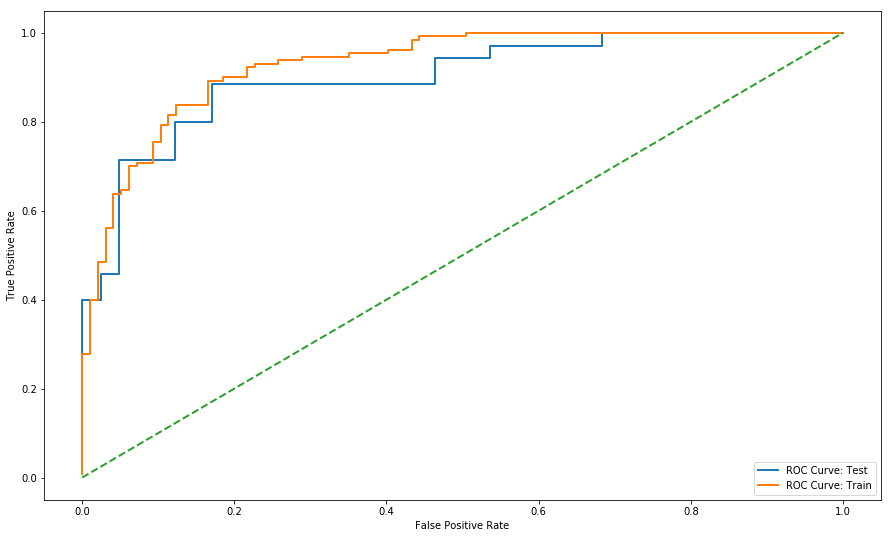

In [58]:
lw = 2
fig, ax = plt.subplots(1, 1, figsize = (15,9))
ax.plot(fpr_test, tpr_test, lw = lw, label = 'ROC Curve: Test')
ax.plot(fpr_train, tpr_train, lw = lw, label = 'ROC Curve: Train')
ax.plot([0,1], [0,1], lw = lw, linestyle = '--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xticks = [i/20 for i in range(21)]
ax.set_yticks = [i/20 for i in range(21)]
ax.legend(loc = 'lower right')
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

custom
AUC train: 0.9325931800158604
AUC train: 0.8989547038327527

custom
AUC train: 0.9325931800158604
AUC train: 0.8989547038327527

custom
AUC train: 0.9325931800158604
AUC train: 0.8989547038327527



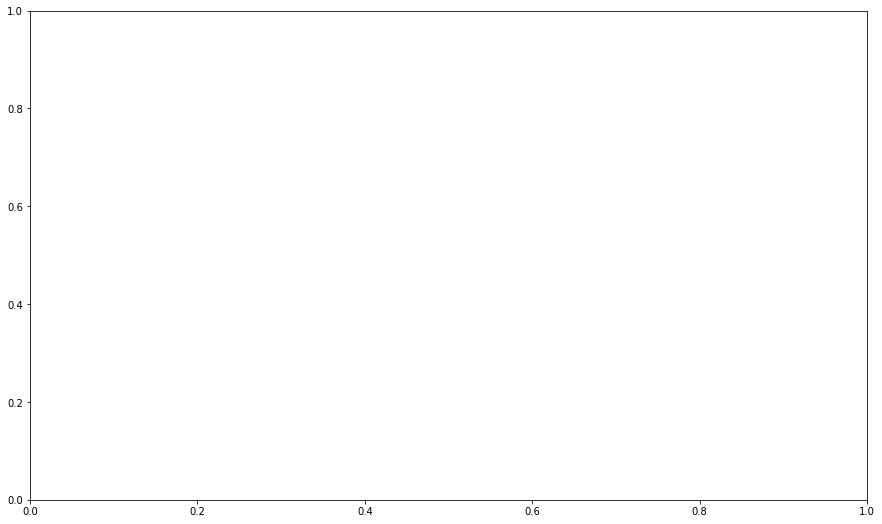

In [61]:
# Your code here


custom = {'fpr_train': None, 'fpr_test': None, 'tpr_train': None, 'tpr_test': None}
sk_no_fit = {'fpr_train': None, 'fpr_test': None, 'tpr_train': None, 'tpr_test': None}
sk_fit = {'fpr_train': None, 'fpr_test': None, 'tpr_train': None, 'tpr_test': None}


weights = grad_desc(X_train, y_train, max_iterations = 50000, alpha = .001)

y_hat_test = sigmoid(np.dot(X_test,weights))
y_hat_train = sigmoid(np.dot(X_train,weights))



custom['fpr_train'] = fpr_train
custom['fpr_test'] = fpr_test
custom['tpr_train'] = tpr_train
custom['tpr_test'] = tpr_test




logreg = LogisticRegression(fit_intercept = False, C = 1e16)
model = logreg.fit(X_train, y_train)

y_score_test = logreg.decision_function(X_test)
y_score_train = logreg.decision_function(X_train)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)


sk_no_fit['fpr_train'] = fpr_train
sk_no_fit['fpr_test'] = fpr_test
sk_no_fit['tpr_train'] = tpr_train
sk_no_fit['tpr_test'] = tpr_test








logreg_intercept = LogisticRegression(fit_intercept = True, C = 1e16)
model_1 = logreg_intercept.fit(X_train, y_train)

y_score_test = logreg_intercept.decision_function(X_test)
y_score_train = logreg_intercept.decision_function(X_train)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)


sk_fit['fpr_train'] = fpr_train
sk_fit['fpr_test'] = fpr_test
sk_fit['tpr_train'] = tpr_train
sk_fit['tpr_test'] = tpr_test
      
models = [custom, sk_no_fit, sk_fit] 
names = ['custom', 'sk_no_fit', 'sk_fit'] 

for index in range(len(models)):
    print (names[i])
    print('AUC train: {}'.format(auc(models[i]['fpr_train'], models[i]['tpr_train'])))
    print('AUC train: {}'.format(auc(models[i]['fpr_test'], models[i]['tpr_test'])))
    print()
      
      


      
      


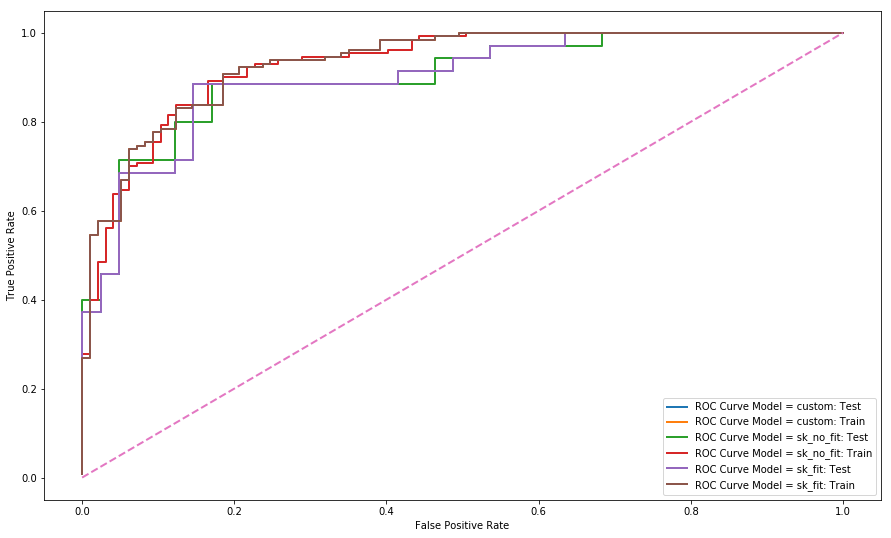

In [63]:
lw = 2
fig, ax = plt.subplots(1, 1, figsize = (15,9))


for i in range(len(models)):      
    ax.plot(models[i]['fpr_test'], models[i]['tpr_test'], lw = lw, label = 'ROC Curve Model = {}: Test'.format(names[i]))
    ax.plot(models[i]['fpr_train'], models[i]['tpr_train'], lw = lw, label = 'ROC Curve Model = {}: Train'.format(names[i]))
      
ax.plot([0,1], [0,1], lw = lw, linestyle = '--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xticks = [i/20 for i in range(21)]
ax.set_yticks = [i/20 for i in range(21)]
ax.legend(loc = 'lower right')
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

Train AUC Difference: 0.0127
Train AUC Difference: 0.019
Train AUC Difference: 0.0197
Train AUC Difference: 0.0235
Train AUC Difference: 0.0251
Train AUC Difference: 0.0255
Train AUC Difference: 0.0269
Train AUC Difference: 0.0287


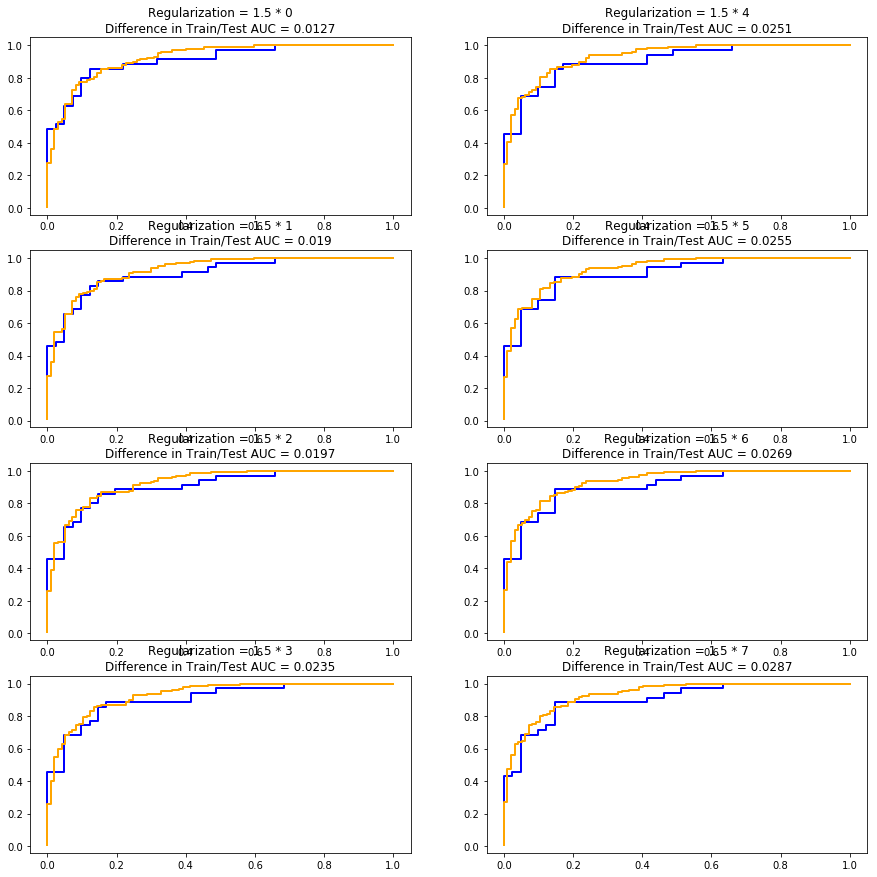

In [77]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i,j]
    ax = axes[i,j]
    logreg = LogisticRegression(fit_intercept = True, C = 1.5 ** (n))
    logreg.fit(X_train, y_train)
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)
    
    fpr_train, tpr_train, tresholds = roc_curve(y_train, y_train_score)
    fpr_test, tpr_test, tresholds = roc_curve(y_test, y_test_score)
    
    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)
    auc_diff = round(train_auc - test_auc, 4)
    
    print('Train AUC Difference: {}'.format(auc_diff))
    
    ax.plot(fpr_test, tpr_test, lw = lw, label = 'test_roc', color = 'blue')
    ax.plot(fpr_train, tpr_train, lw = lw, label = 'train_roc', color = 'orange')
    ax.set_title('Regularization = 1.5 * {}\nDifference in Train/Test AUC = {}'.format(n, auc_diff))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

 Bigger difference in AUC with higher C parameter -> removing regularization could lead to overfitting

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
